## **Conectividades De Internet**

En este notebook nos haremos un analisis exploratorio de los datos que se encuentran en el Dataset. Nuestro objetivo principal es aplicar metodos matematicos y el uso de graficos con el fin de encontrar informacion util como:

* Outliers
* Quartiles
* Metodos estadisticos (Moda, Media, Mediana, Varianza, Desviacion Estandar)
* Stack Ranks

Nuestro codigo se repartira en distintas secciones teniendo una similitud con el patron Modelo - Vista - Controlador (MVC):

Celda de librerias.
Celda de acciones.
Celda de vistas.

## **Enfoque**

Los datos que tomaremos para el ejercicio sera:

* "data\Internet_Accesos-por-tecnologia.csv"
* "data\Internet_BAF.csv"
* "data\Homologacion_equipos.csv"

Esto nos permitira observar el tipo de redes y como se distribuyen entre las herramientas tecnologicas que permiten velocidades altas o bajas en el internet. De esta manera podremos tener una perspectiva mas centrada de los recursos disponibles para nuestro modelo de negocio. Este ejercicio solo pretender observar el desarrollo del uso del internet fijo o de hogar.


## 1. Librerias
Esta celda nos ayudara a cargar las librerias necesarias y extraer los Datasets necesarios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignorar Warnings
import warnings
warnings.filterwarnings("ignore")


sns.set() #Estandarizamos los diseños de la grafica
sns.color_palette("husl", 8)


#Carga del dataset
inter_access = pd.read_csv("C:\\Users\\andre\\Documents\\Py Codes\\data\\Internet_BAF.csv",sep=",")
inter_tech = pd.read_csv("C:\\Users\\andre\\Documents\\Py Codes\\data\\Internet_Accesos-por-conectividad.csv",sep=",")
inter_mercado = pd.read_csv("C:\\Users\\andre\Documents\\Py Codes\\data\\Homologacion_equipos.csv")

## 2. Acciones
Esta celda nos ayudara a crear todas las funciones que se vayan requiriendo durante el ejercicio.

## 3. Vistas
Las siguientes celdas se enfocaran en el analisis exploratorio de los distintos Datasets

## 3.1 Accesos por tecnologia y conectividad EDA

En este espacio trabajaremos dos datasets en conjuntos ya que conceptualmente se relacionan entre si. Es decir, el dataset "data\Internet_BAF.csv" nos muestra los tipos de conectividad existente dentro de las provincias argentinas como puntos de acceso. Esto es: __Banda Ancha__ y __Dial Up__.
Es importante resaltar que estos tipos de conectividad son muy diferentes entre si ya que el __Dial Up__ cuenta con una antiguedad mucho mayor que la __Banda Ancha__.
Y el dataset "data\lista_localidad_conectividad_internet.csv" nos habla de la tecnologia utilizada para cubrir el servicio de internet dentro de las distintias provincias. Aca se veran reflejadas tecnologias como:

* ADSL
* Cablemoden
* Fibra Optica
* Wireless
* Otros

## 3.1.1 Relacion Conectividad y Herramientas

En este apartado mostraremos como se distribuyen las tecnologias de conectividad y a su vez como las distintas herramientas se ven distribuidas dentro de estas.

In [2]:
#Dataframe que calcula los porcentajes de participacion de la conectividad entre provincias

inter_access_filtro = inter_access[inter_access["Año"] == 2022]
puntos_acceso_2022 = inter_access_filtro[inter_access_filtro["Trimestre"] == 4]
puntos_acceso_2022["participacion_banda_ancha"] = round((puntos_acceso_2022["Banda ancha fija"]/puntos_acceso_2022["total"])*100,2)
puntos_acceso_2022["participacion_dial_up"] =  100-puntos_acceso_2022["participacion_banda_ancha"]
puntos_acceso_2022.sort_values(by="participacion_banda_ancha", inplace=True)

#Dataframe que calcula los porcentajes de participacion de las tecnologias entre provincias

df_concat = puntos_acceso_2022
df_concat = df_concat.rename(columns={"Provincia": "Provincia_1"})

calculate_col = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros',"Total"]
drop_col = ["Año","Trimestre",'Provincia_1','Banda ancha fija', 'Dial up', 'total', 'participacion_banda_ancha','participacion_dial_up','ADSL','Wireless',"Total",'Cablemodem', 'Fibra óptica']

inter_tech_filtro = inter_tech[inter_tech["Año"]==2022]
tech_2022 = inter_tech_filtro[inter_tech_filtro["Trimestre"]==4]

#Concatenamos los dataframes puntos_acceso_2022 y tech_2022 para darles el mismo orden dentro de las graficas
tech_2022 = pd.concat([tech_2022,df_concat],axis=1, join="inner",sort=False)

for col in calculate_col:
    tech_2022[col]=round((tech_2022[col]/tech_2022["Total"]) * 100,2)
tech_2022.sort_values(by='participacion_banda_ancha',inplace=True)
tech_2022.reset_index(inplace=True)
tech_2022["modem_o_fibra"] = tech_2022["Cablemodem"]+tech_2022["Fibra óptica"]
tech_2022["Otros"]=tech_2022["Total"] - tech_2022["modem_o_fibra"]
tech_2022.drop(columns=drop_col,inplace=True)


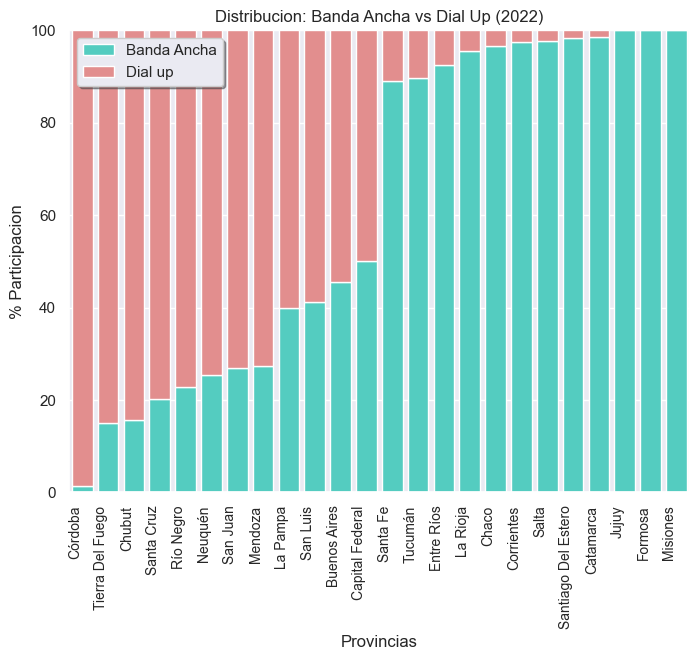

In [3]:
#Haremos unos plots

plt.figure(figsize=(8,6))
sns.barplot(puntos_acceso_2022, x= "Provincia", y= "participacion_banda_ancha", label = "Banda Ancha", color="turquoise")
sns.barplot(puntos_acceso_2022, x= "Provincia", y= "participacion_dial_up", label = "Dial up", color="lightcoral", bottom = puntos_acceso_2022["participacion_banda_ancha"])
plt.xlabel("Provincias")
plt.ylabel("% Participacion")
plt.title("Distribucion: Banda Ancha vs Dial Up (2022)")
plt.xticks(rotation=90, ha='right',fontsize = 10)
plt.legend(shadow=True)
plt.show()


## Observaciones:

* Podemos notar que varias provincias de Argentina tienen en su mayoria una gran conexion de banda ancha. Esta distribucion nos ayuda a enfocarnos en sitios como Misiones,Formosa, Jujuy, etc.

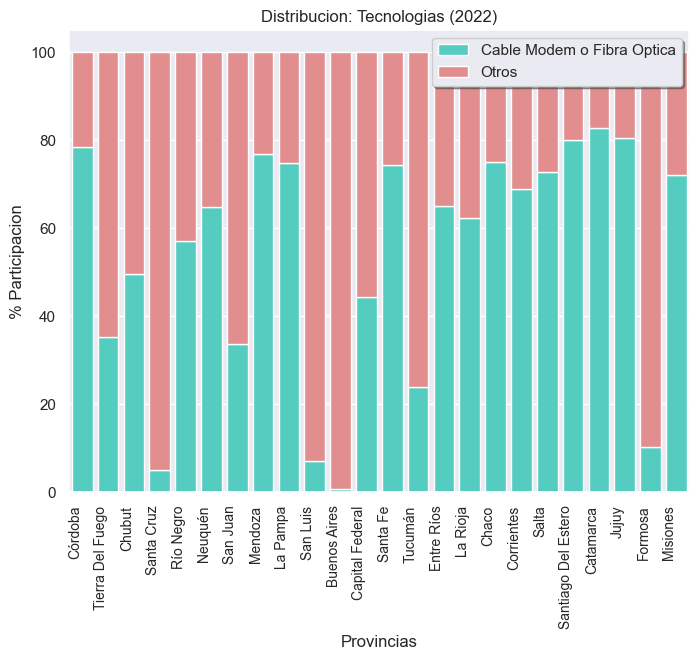

In [4]:
#Haremos unos plots
plt.figure(figsize=(8,6))

sns.barplot(tech_2022, x= "Provincia", y= "modem_o_fibra", label = "Cable Modem o Fibra Optica", color="turquoise" )
sns.barplot(tech_2022, x= "Provincia", y= "Otros", label = "Otros", color="lightcoral", bottom = tech_2022["modem_o_fibra"] )

plt.xlabel("Provincias")
plt.ylabel("% Participacion")
plt.title("Distribucion: Tecnologias (2022)")
plt.xticks(rotation=90, ha='right',fontsize = 10)
plt.legend(shadow=True)
plt.show()

## Observaciones:

* Gracias a este grafico nuestra atencion se calibra segun a las expectativas de negocio. Aquellas provincias que manejan un gran porcentaje de tecnologias enfocadas a Cable Modem o Fibra Optica nos facilitan la entrada como empresa de telecomunicaciones de alto nivel.

* Zonas de interes: Misiones, Jujuy, Catamarca,Santiago del Estero, Salta

## 3.2 Homologacion Y Actualizacion de Equipos

En este apartado analizaremos el dataset "data\Homologacion_equipos.csv". La cual contiene datos de aquellas empresas que se han encargado de todo tipo de solicitudes desde revisiones o visitas tecnicas hasta la actualizacion de equipos. Nuestro interes sera en la competencia directa que pueda generar ciertas compañias de telecomunicaciones al tener un gran interes en modernizar su infraestructura como tambien de ofrecer un servicio.

## 3.2.1 Actualizacion

En las siguientes celdas veremos la distribucion de actualizacion y cualquier otra metrica que nos competa para evaluar al mercado.

In [5]:
inter_mercado.head()

,Expediente,Documento,Solicitante,Calle,Nro,Piso,Dpto,CPA,Localidad,Partido,Provincia,Tramite,Actuacion,F_Vencimiento,Reg_Com,Reg_Fab
0,EXPCNC E 4589/2001,CUIT 30-69799813-2,"ASAHI ARGENTINA S.A.,",TALCAHUANO,750,8,NaN,C1013AAP,CIUDAD DE BUENOS AIRES,NaN,CAPITAL FEDERAL,RENOVACION COMERCIALIZACION,Disposición 1781 GI/2008,23/05/2011,30-1398,-0
1,EXPCNC E 9484/2000,CUIT 30-61593482-4,"IGT GLOBAL SOLUTIONS CORPORATION,",AVDA. CABILDO,4566,7°,NaN,C1429ABQ,CABA,CABA,CIUDAD DE BUENOS AIRES,COMERCIALIZACION,Resolución 85 ENACOM/2016,22/02/2019,30-2153,-0
2,EXPCNC E 15687/1998,CUIT 30-69330140-4,"OMNISAT S.A.,",BRASIL,731,NaN,NaN,1154,CIUDAD DE BUENOS AIRES,CABA,CIUDAD DE BUENOS AIRES,COMERCIALIZACION,Disposición 217 GI/1999,22/01/2002,30-1336,-0
3,EXPCNC E 9369/1999,CUIT 30-70052972-6,"UBICAR S.R.L.,",INDEPENDENCIA,3333,NaN,NaN,1225,CIUDAD DE BUENOS AIRES,CABA,CIUDAD DE BUENOS AIRES,COMERCIALIZACION,Disposición 3765 GI/1999,09/09/2002,30-1350,-0
4,EXPCNC E 4684/1998,CUIT 30-68831569-3,"NATURAL MICROSYSTEMS LATIN AMERICA S.A.,",PERON TTE GRAL JUAN DOMINGO,328,3,NaN,C1038AAH,CIUDAD AUTONOMA BUENOS AIRES,CAPITAL FEDERAL,CIUDAD DE BUENOS AIRES,COMERCIALIZACION,Disposición 2105 GI/1998,21/05/2001,30-1314,-0
